In [1]:
from pathlib import Path
from stardist.matching import matching_dataset
from tifffile import imread
from tqdm.notebook import tqdm

from benchmark_instance import plot_performance, plot_stat_comparison

In [2]:
path_images = Path.home() / "Desktop/Code/CELLSEG_BENCHMARK/RESULTS/full data"
gt_path = path_images / "LABELS/relabel_gt.tif"
results = path_images / "instance"
predictions = [imread(str(p))[:50,:,:] for p in sorted(results.glob("*.tif"))]
# predictions = [imread(str(p)) for p in sorted(results.glob("*.tif"))]
pred_names = [p.name for p in sorted(results.glob("*.tif"))]

In [3]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Y_val = imread(str(gt_path))[:50,:,:]

Validating on instance_sigma65.0_threshold_pred_SegResNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_Swin_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_TRAILMAP_DiceCE_best_metric.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_WNet_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma75.0_threshold_pred_VNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on isotropic_visual_cp_masks(1).tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on stardist_labels.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************


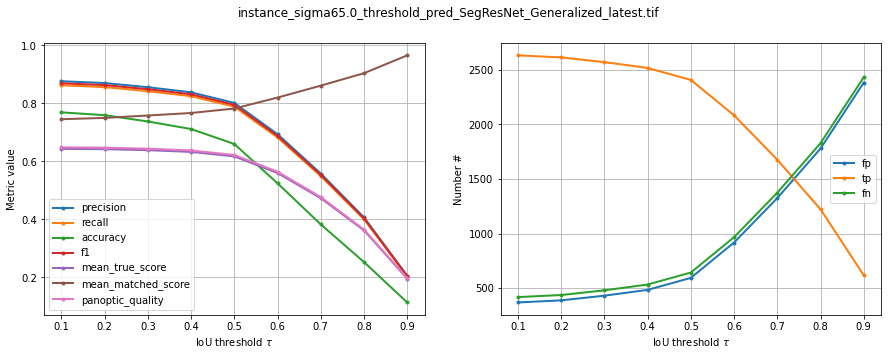

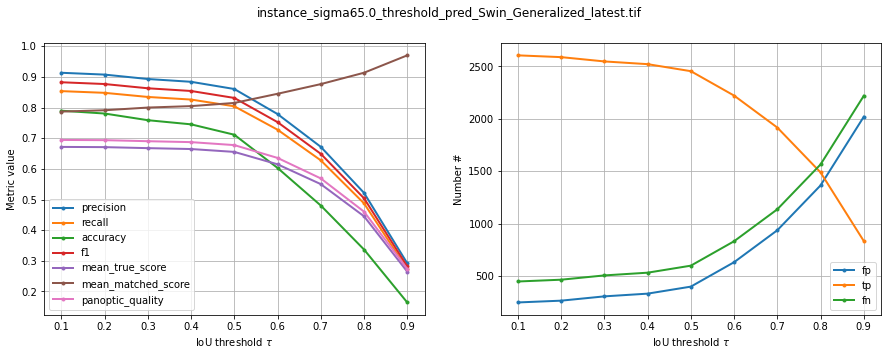

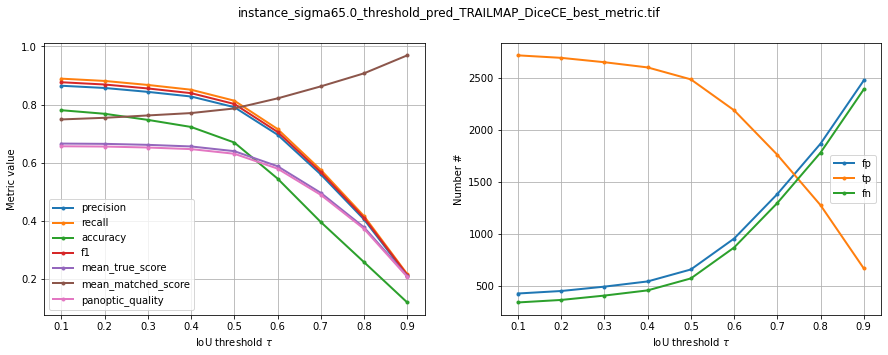

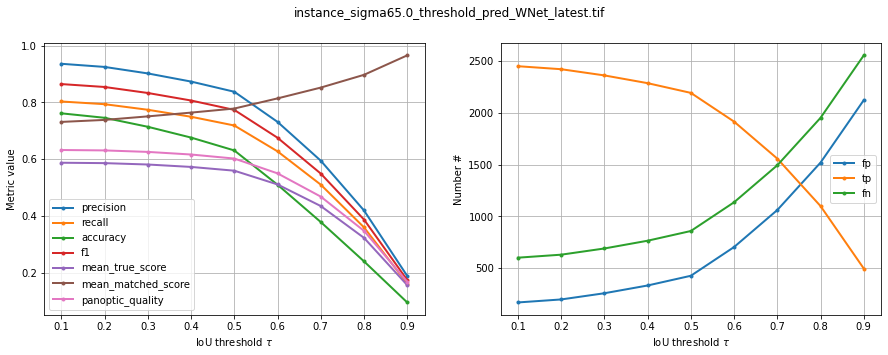

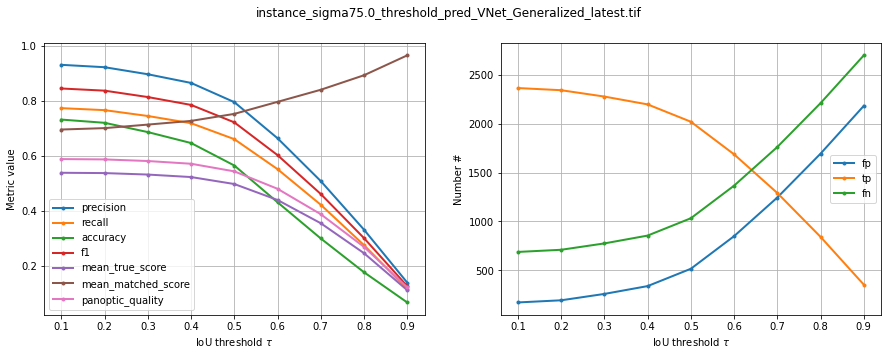

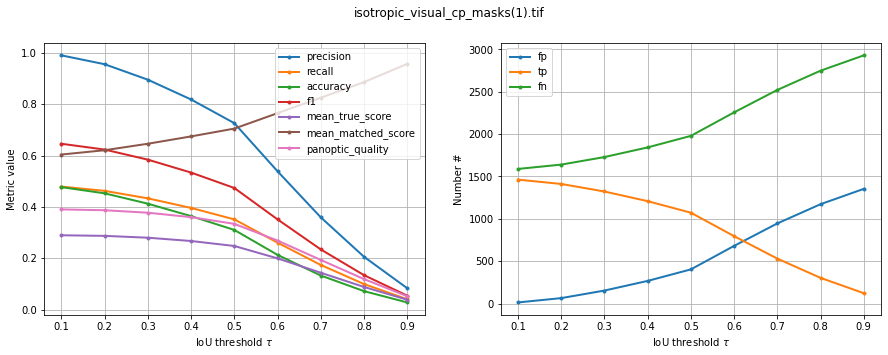

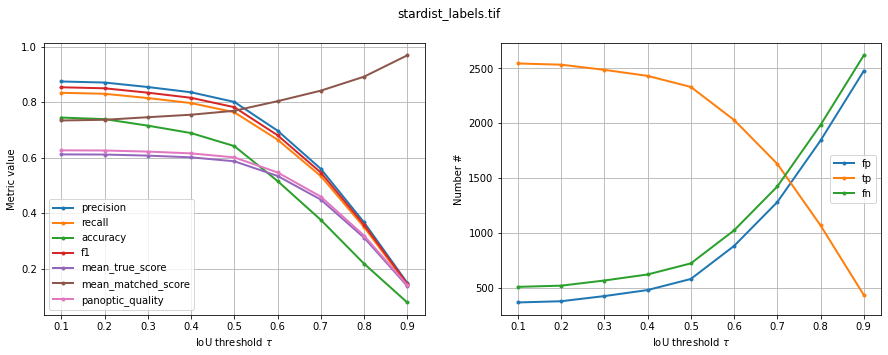

In [4]:
model_stats = []
for i, p in enumerate(predictions):
    Y_val_pred = p
    print(f"Validating on {pred_names[i]}")
    stats = [matching_dataset(Y_val, Y_val_pred, thresh=t, show_progress=False) for t in tqdm(taus)]
    model_stats.append(stats)
    plot_performance(taus, stats, name=pred_names[i])
    print("*"*20)

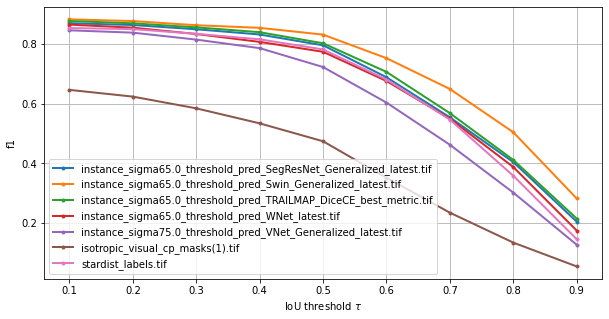

In [5]:
plot_stat_comparison(taus, model_stats,pred_names)

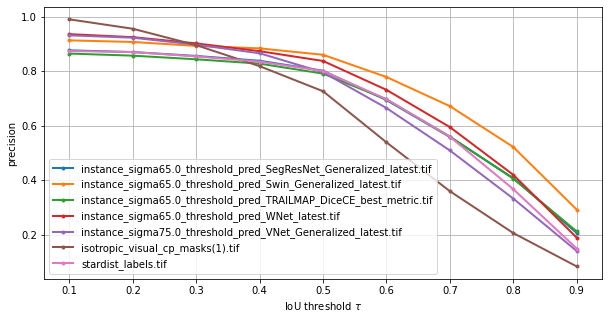

In [6]:
plot_stat_comparison(taus, model_stats,pred_names, stat="precision")

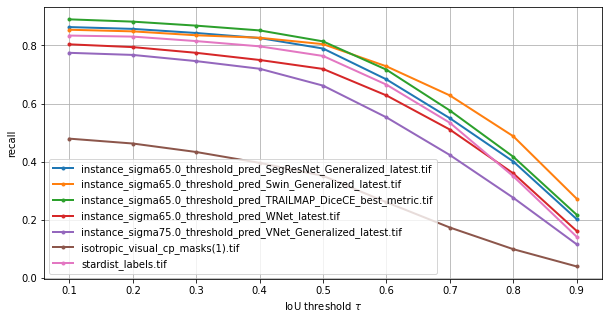

In [7]:
plot_stat_comparison(taus, model_stats,pred_names, stat="recall")

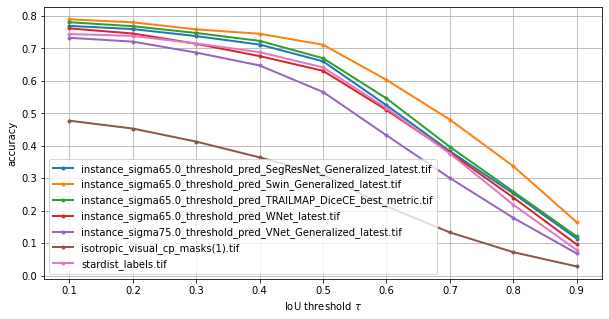

In [8]:
plot_stat_comparison(taus, model_stats,pred_names, stat="accuracy")

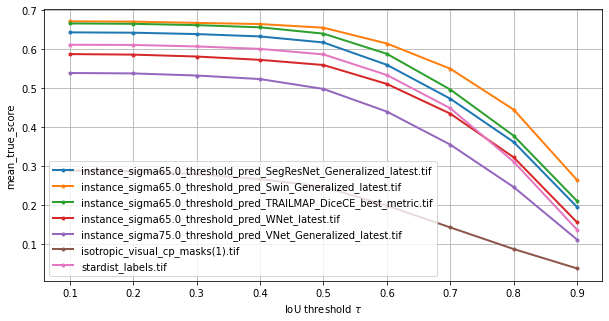

In [9]:
plot_stat_comparison(taus, model_stats,pred_names, stat="mean_true_score")

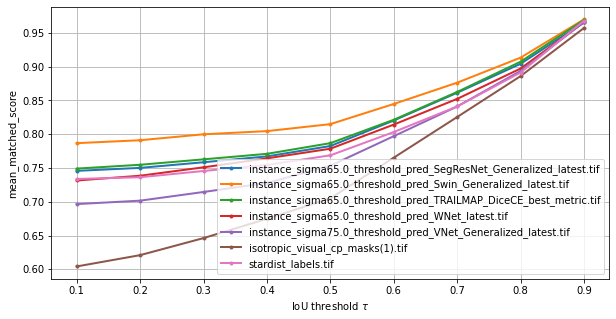

In [10]:
plot_stat_comparison(taus, model_stats,pred_names, stat="mean_matched_score")

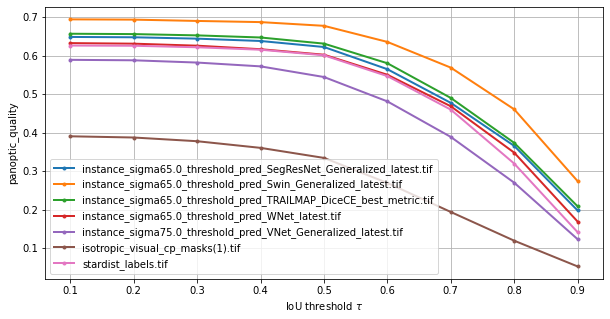

In [11]:
plot_stat_comparison(taus, model_stats,pred_names, stat="panoptic_quality")

Validating on instance_sigma65.0_threshold_pred_SegResNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_Swin_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_TRAILMAP_DiceCE_best_metric.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_WNet_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma75.0_threshold_pred_VNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on isotropic_visual_cp_masks(1).tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on stardist_labels.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************


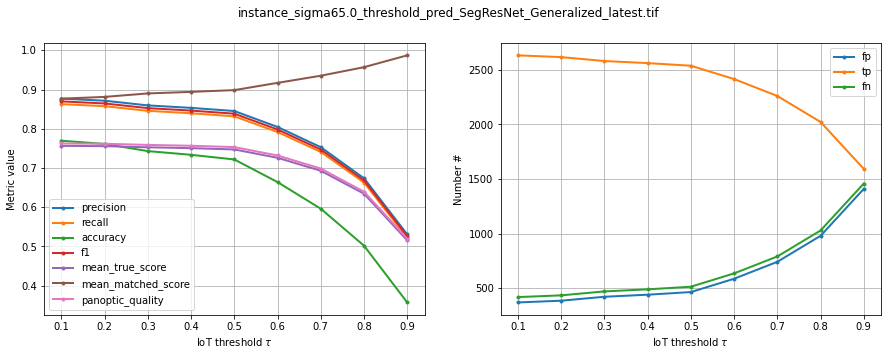

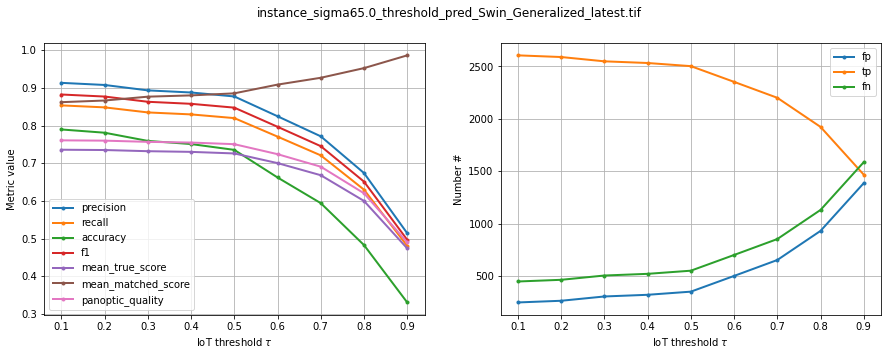

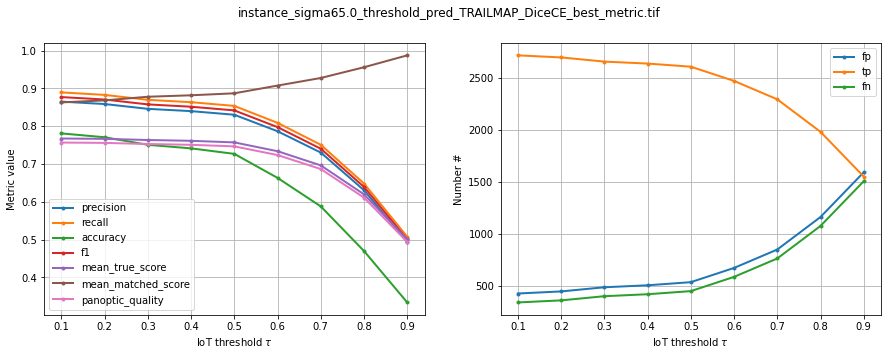

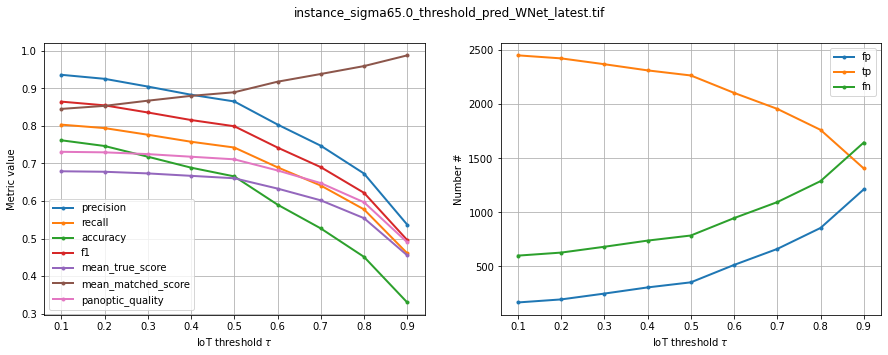

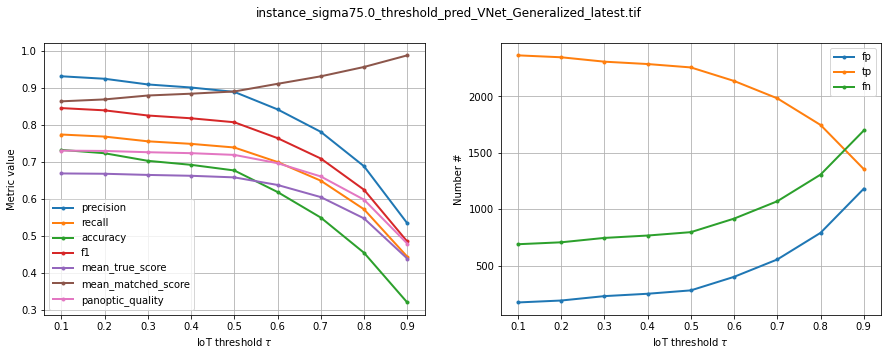

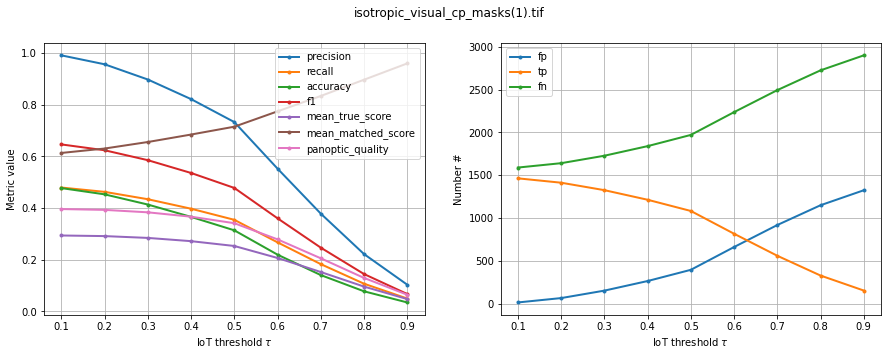

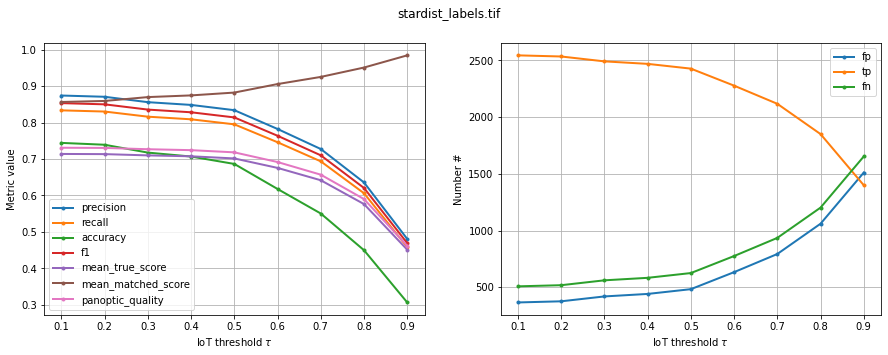

In [12]:
model_stats_2 = []
for i, p in enumerate(predictions):
    Y_val_pred = p
    print(f"Validating on {pred_names[i]}")
    stats = [matching_dataset(Y_val, Y_val_pred, thresh=t, show_progress=False, criterion='iot') for t in tqdm(taus)]
    model_stats_2.append(stats)
    plot_performance(taus, stats, name=pred_names[i], metric="IoT")
    print("*"*20)

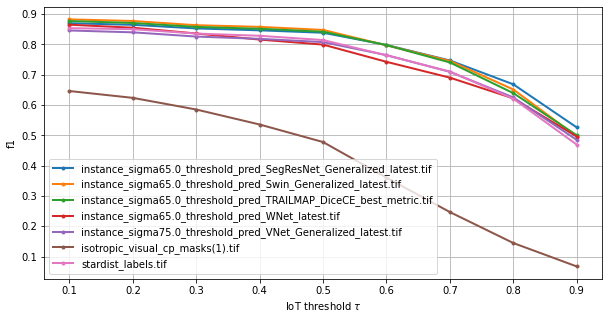

In [13]:
plot_stat_comparison(taus, model_stats_2,pred_names, metric="IoT")

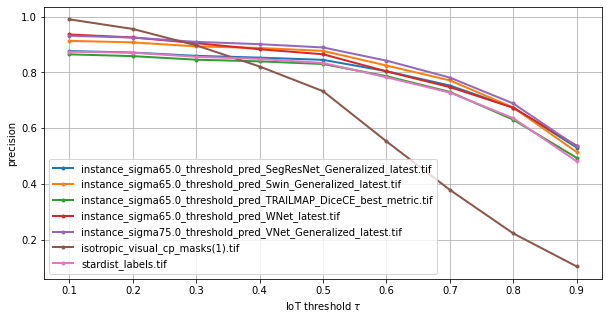

In [14]:
plot_stat_comparison(taus, model_stats_2,pred_names, stat="precision", metric="IoT")

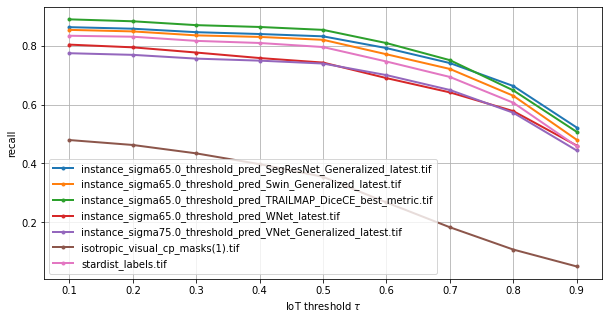

In [15]:
plot_stat_comparison(taus, model_stats_2,pred_names, stat="recall", metric="IoT")

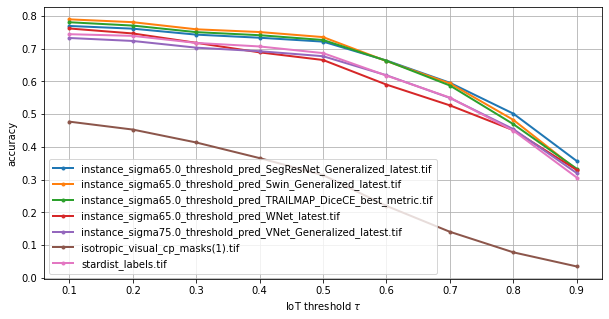

In [16]:
plot_stat_comparison(taus, model_stats_2,pred_names, stat="accuracy", metric="IoT")

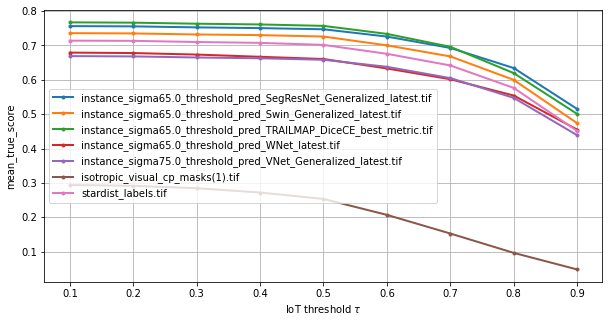

In [17]:
plot_stat_comparison(taus, model_stats_2,pred_names, stat="mean_true_score", metric="IoT")

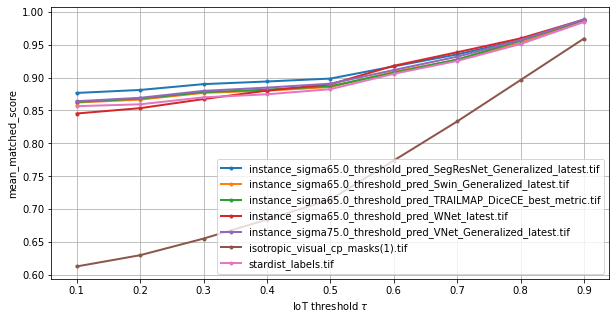

In [18]:
plot_stat_comparison(taus, model_stats_2,pred_names, stat="mean_matched_score", metric="IoT")

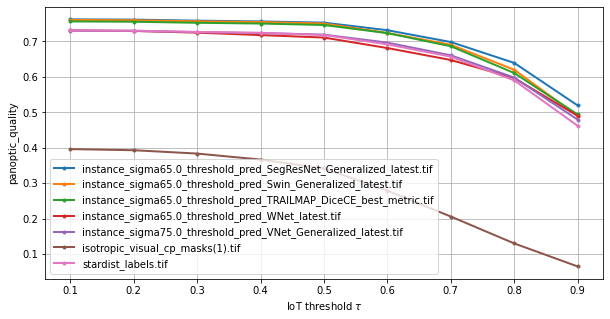

In [19]:
plot_stat_comparison(taus, model_stats_2,pred_names, stat="panoptic_quality", metric="IoT")

Validating on instance_sigma65.0_threshold_pred_SegResNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_Swin_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_TRAILMAP_DiceCE_best_metric.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma65.0_threshold_pred_WNet_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_sigma75.0_threshold_pred_VNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on isotropic_visual_cp_masks(1).tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on stardist_labels.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************


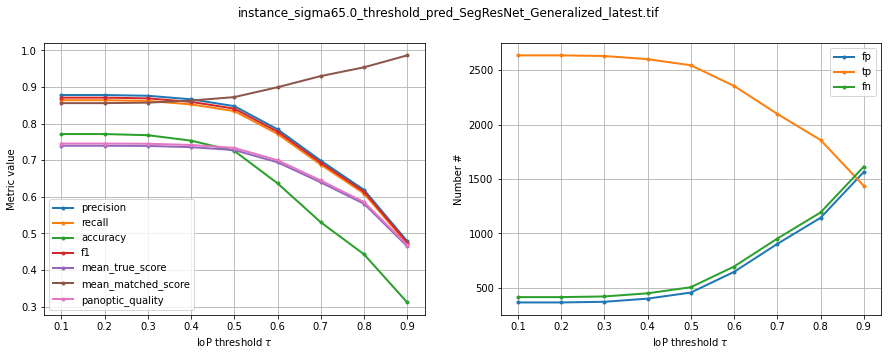

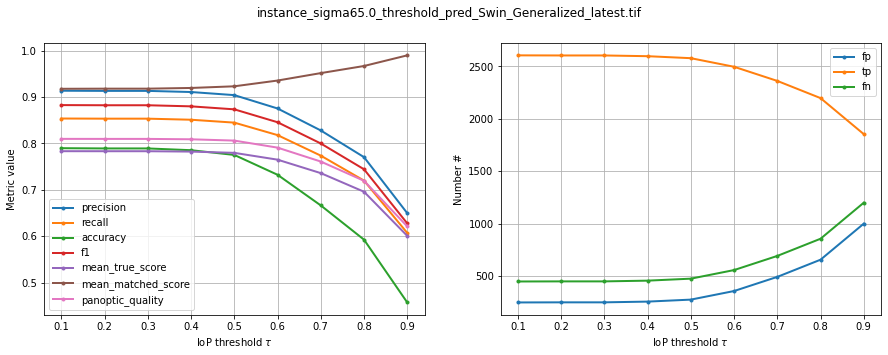

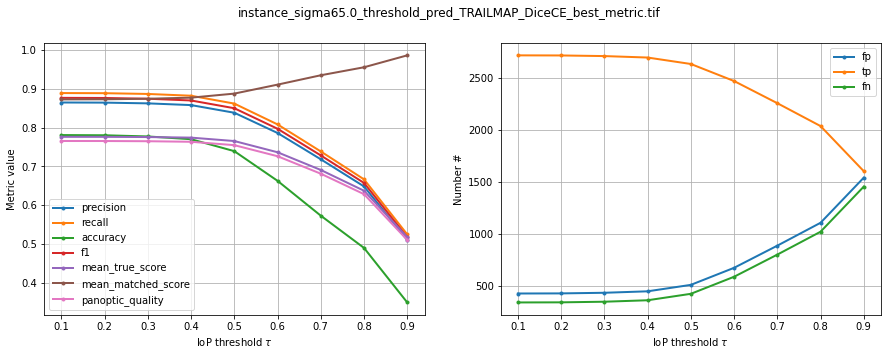

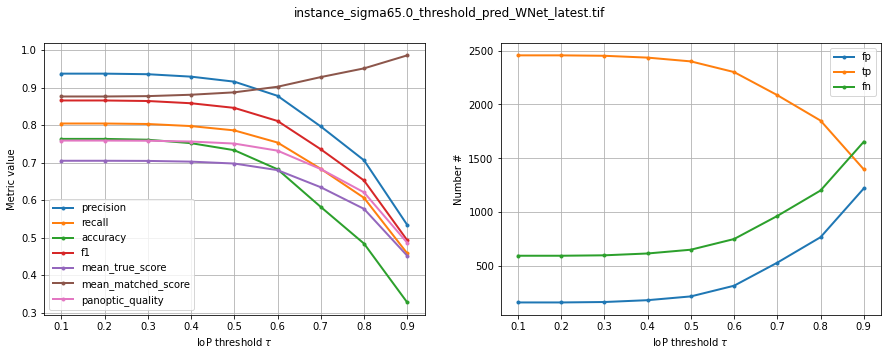

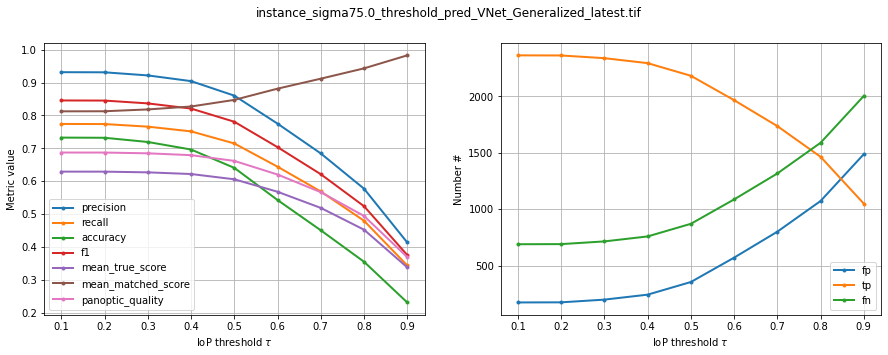

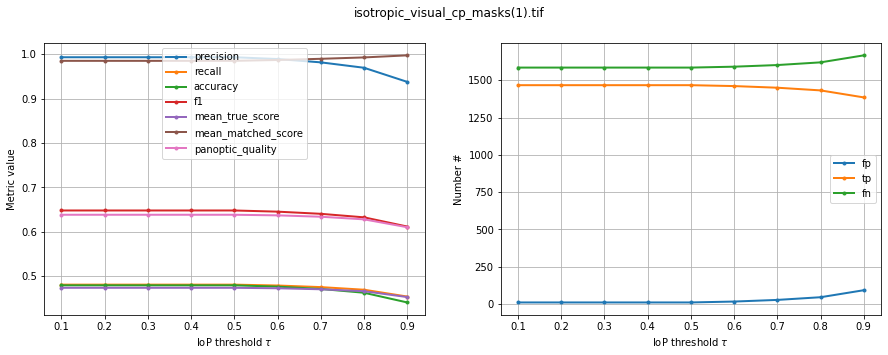

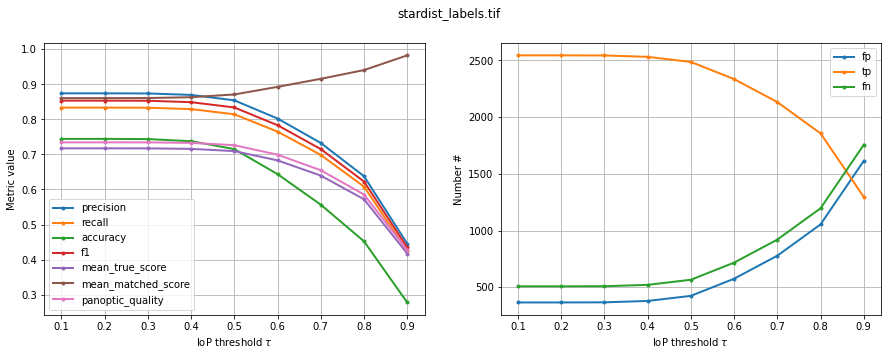

In [20]:
model_stats_3 = []
for i, p in enumerate(predictions):
    Y_val_pred = p
    print(f"Validating on {pred_names[i]}")
    stats = [matching_dataset(Y_val, Y_val_pred, thresh=t, show_progress=False, criterion='iop') for t in tqdm(taus)]
    model_stats_3.append(stats)
    plot_performance(taus, stats, name=pred_names[i], metric="IoP")
    print("*"*20)

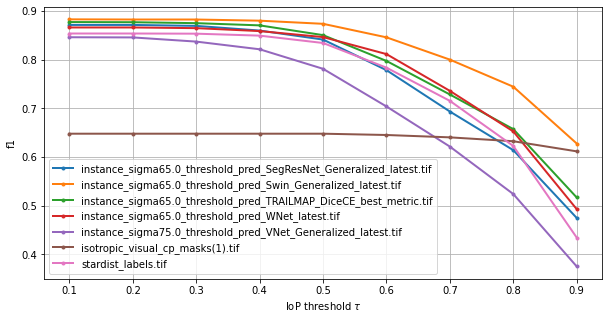

In [21]:
plot_stat_comparison(taus, model_stats_3,pred_names, metric="IoP")

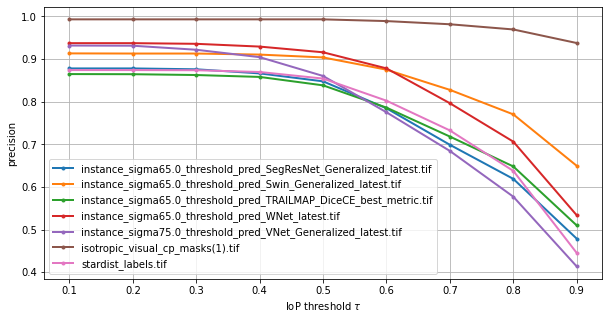

In [22]:
plot_stat_comparison(taus, model_stats_3,pred_names, stat="precision", metric="IoP")

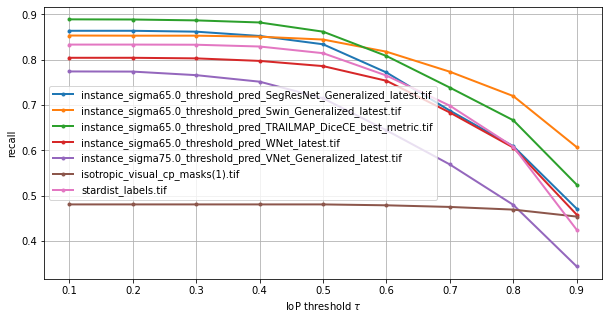

In [23]:
plot_stat_comparison(taus, model_stats_3,pred_names, stat="recall", metric="IoP")

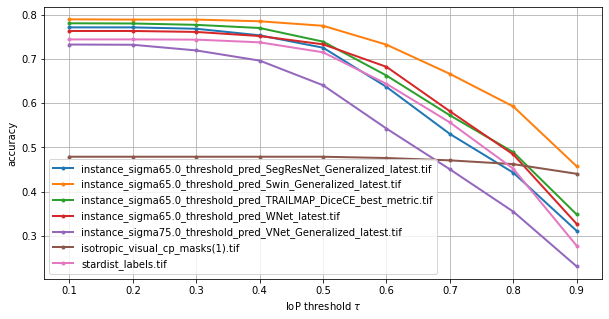

In [24]:
plot_stat_comparison(taus, model_stats_3,pred_names, stat="accuracy", metric="IoP")

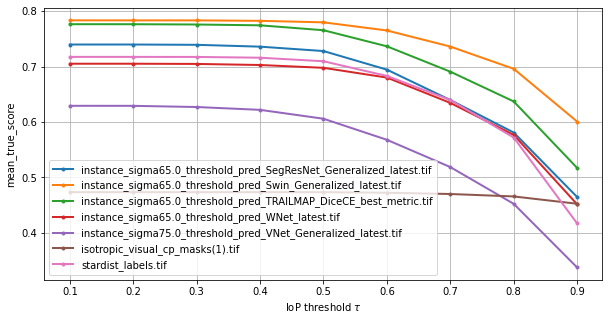

In [25]:
plot_stat_comparison(taus, model_stats_3,pred_names, stat="mean_true_score", metric="IoP")

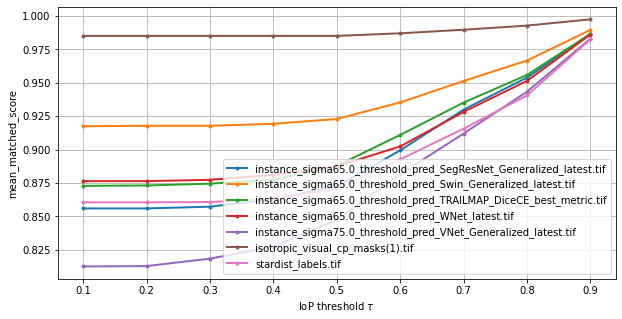

In [26]:
plot_stat_comparison(taus, model_stats_3,pred_names, stat="mean_matched_score", metric="IoP")

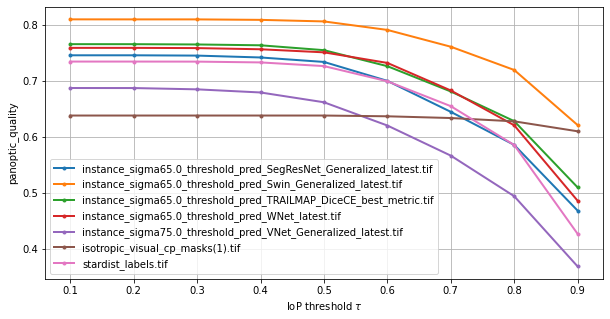

In [27]:
plot_stat_comparison(taus, model_stats_3,pred_names, stat="panoptic_quality", metric="IoP")